In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme()

***Cargamos dataset***

In [42]:
df_udemy = pd.read_csv("Dataset/udemy_courses.csv")

#### **EDA**

In [43]:
df_udemy.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance


In [44]:
df_udemy.shape

(3678, 12)

In [45]:
df_udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


***No posee valores nulos***

In [46]:
df_udemy.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

***Tiene valores duplicados***

In [47]:
df_udemy.duplicated(subset="url").value_counts()

False    3672
True        6
dtype: int64

In [48]:
df_udemy[df_udemy.duplicated(subset="url")].url.values

array(['https://www.udemy.com/essentials-of-money-value/',
       'https://www.udemy.com/introduction-to-forex-trading-business-for-beginners/',
       'https://www.udemy.com/understanding-financial-statements/',
       'https://www.udemy.com/cfa-level-2-quantitative-methods/',
       'https://www.udemy.com/microstation-celulas/',
       'https://www.udemy.com/build-beautiful-html5-website/'],
      dtype=object)

#### **Feature Engineering:**

***Eliminamos duplicados***

In [49]:
df_udemy.drop_duplicates(subset="url", inplace=True)

In [50]:
df_udemy.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,6.758977e+05,66.102941,3190.586874,156.371460,40.140251,4.097603
std,3.430720e+05,61.035920,9488.105448,936.178649,50.417102,6.057830
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.077615e+05,20.000000,111.750000,4.000000,15.000000,1.000000
50%,6.876920e+05,45.000000,912.000000,18.000000,25.000000,2.000000
75%,9.608140e+05,95.000000,2548.750000,67.000000,46.000000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


***Verifico que los valores sean correctos***

In [51]:
df_udemy["is_paid"].value_counts()

True     3362
False     310
Name: is_paid, dtype: int64

In [52]:
(df_udemy["price"] == 0).value_counts()

False    3362
True      310
Name: price, dtype: int64

***Decido generar una columna llamada "total_sale" (suscriptores X precio del curso), para segmentar los cursos según el ingreso que reciben***

In [53]:
df_udemy["total_sale"] = df_udemy["price"] * df_udemy["num_subscribers"]

#### **EDA:**

In [54]:
df_udemy.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,total_sale
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,429400
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,209400


##### Cantidad de Cursos según Nivel

<AxesSubplot: xlabel='level', ylabel='count'>

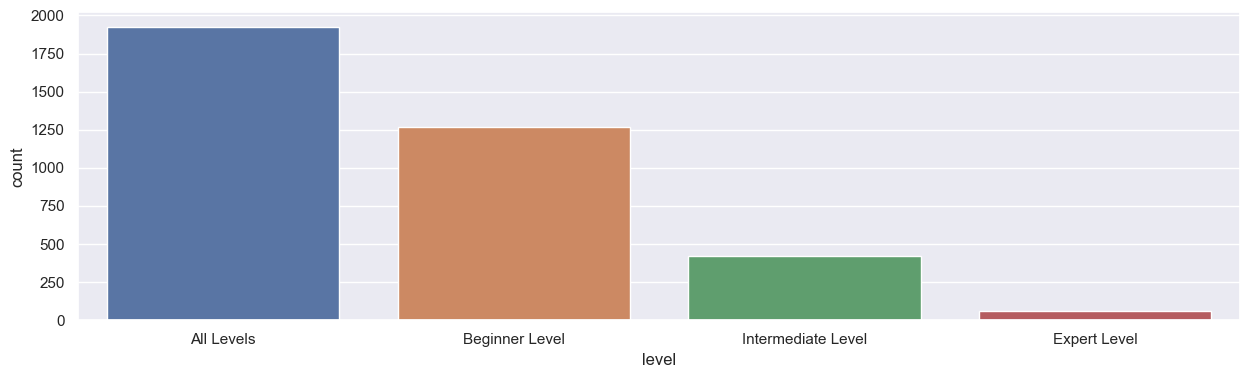

In [55]:
sns.countplot(data= df_udemy, x="level", order=df_udemy["level"].value_counts().index)

In [56]:
df_udemy.level.value_counts(normalize=True)

All Levels            0.524237
Beginner Level        0.345316
Intermediate Level    0.114651
Expert Level          0.015795
Name: level, dtype: float64

**Observación:** La mayoría de los cursos son para todos los niveles (52%). Mientras que los niveles expertos conforman el 1%

##### Cantidad de Cursos según Temática

<AxesSubplot: xlabel='subject', ylabel='count'>

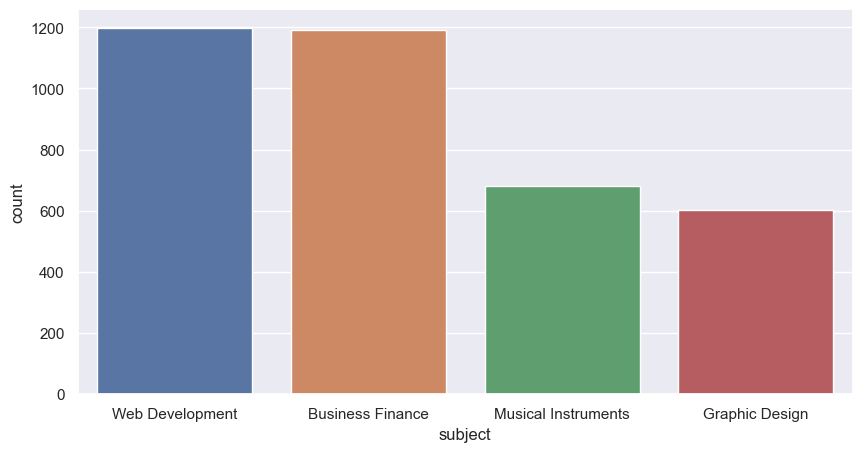

In [57]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data= df_udemy, x="subject", order=df_udemy["subject"].value_counts().index)

In [58]:
df_udemy.subject.value_counts(normalize=True)

Web Development        0.326525
Business Finance       0.324346
Musical Instruments    0.185185
Graphic Design         0.163943
Name: subject, dtype: float64

**Observación:** Las temáticas con mayor cantidad de cursos son "Web Development" y "Business Finance"

##### Cantidad de Suscriptores según Nivel y Temática

In [1]:
#Creamos un filtro para ordenar el gráfico
filtro = df_udemy.groupby("subject").sum().sort_values(by="num_subscribers",ascending=False).num_subscribers.index

NameError: name 'df_udemy' is not defined

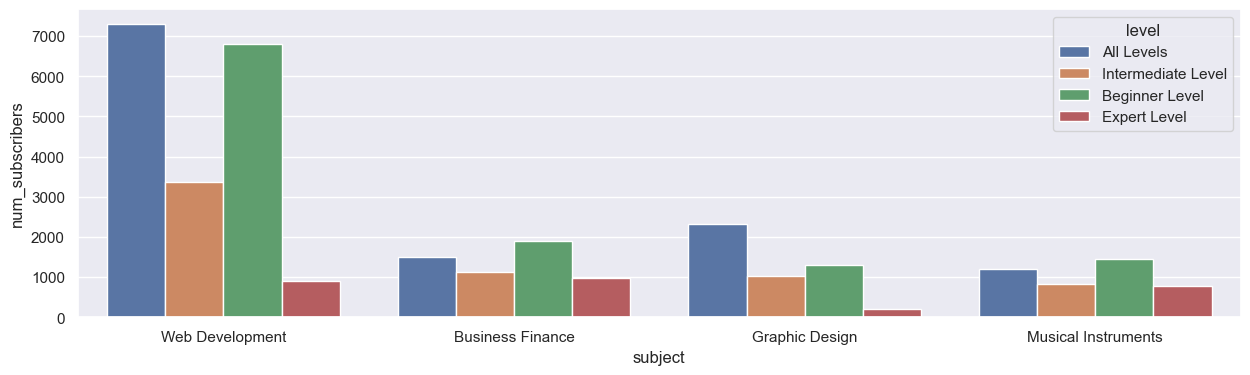

In [60]:
sns.barplot(data= df_udemy, x="subject", y="num_subscribers", hue="level", 
            order=filtro, ci=None)
sns.set(rc={'figure.figsize':(15,4)})

**Observación:** La temática que mayor cantidad de suscriptores tiene es Web Development

##### Cantidad de Suscriptores por Temática

In [2]:
df_udemy.groupby("subject").mean().num_subscribers

NameError: name 'df_udemy' is not defined

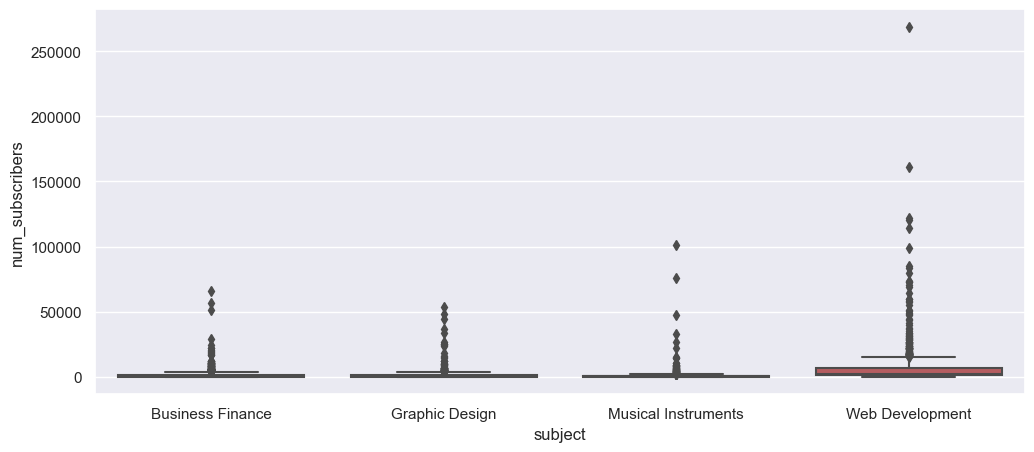

In [62]:
fig, ax = plt.subplots(figsize=(12,5))
g = sns.boxplot(data=df_udemy, y="num_subscribers", x="subject", ax=ax)
#ax.set_ylim(0,20000)

**Observación:** Este tipo de productos digitales presenta mucha varianza frente al público. "Web Development" es la temática con mayor cantidad promedio de suscriptores con 6620, mientras que el resto de temáticas tiene un promedio de  1500 suscriptores por curso

##### Cuales son los cursos más caros y con más cantidad de suscriptores

<AxesSubplot: xlabel='price', ylabel='num_subscribers'>

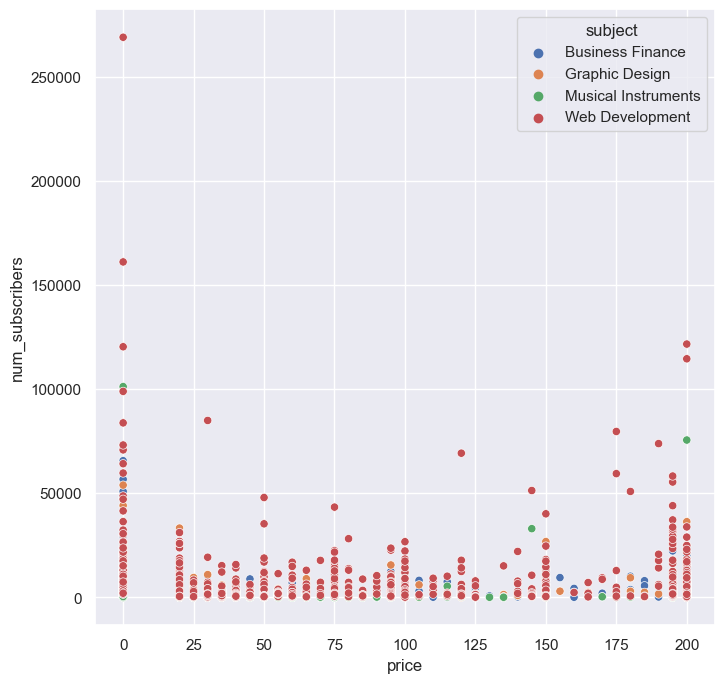

In [63]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=df_udemy, x="price", y="num_subscribers", hue="subject", ax=ax)
#ax.set_ylim(0,100000)

El gráfico incluye cursos gratuitos en x=0. Los cursos gratuitos son los que presentan la mayor cantidad de suscriptores.

Ahora voy a filtrar el gráfico para solo mostrar los cursos de pago

[None]

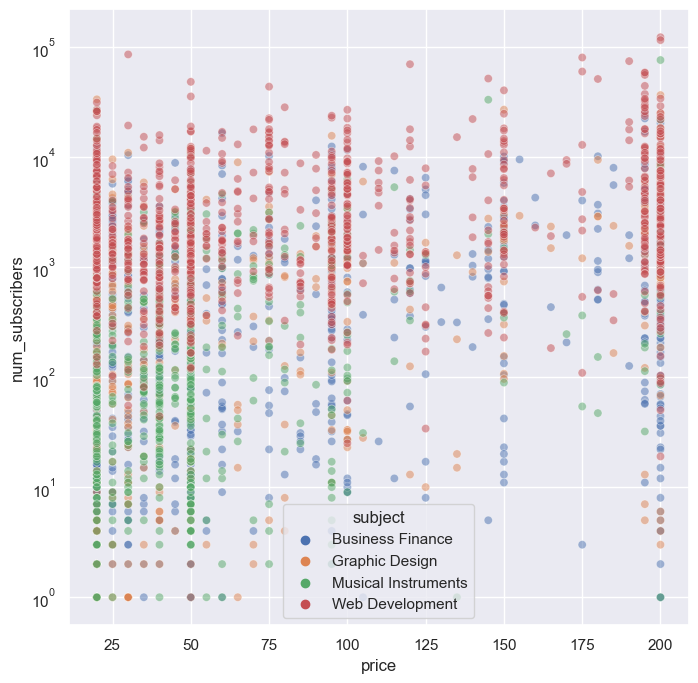

In [64]:
df_scatter = df_udemy[df_udemy["is_paid"] == True]

fig, ax = plt.subplots(figsize=(8,8))
splot = sns.scatterplot(data=df_scatter, x="price", y="num_subscribers", hue="subject", ax=ax, alpha=0.5)
splot.set(yscale="log")
#ax.set_yticks(np.arange(0,120000,5000))

In [65]:
df_udemy[df_udemy["is_paid"] == True].sort_values(by=["num_subscribers", "price"], ascending=[False, False]).iloc[:10]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,total_sale
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02T21:13:27Z,Web Development,24316800
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08T22:28:36Z,Web Development,22902400
2619,94430,Learn Javascript & JQuery From Scratch,https://www.udemy.com/learn-javascript-jquery-...,True,30,84897,2685,10,All Levels,2.0,2013-10-10T15:19:29Z,Web Development,2546910
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12T23:19:54Z,Web Development,13932100
1979,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,True,200,75499,7676,362,All Levels,30.0,2014-08-07T06:27:51Z,Musical Instruments,15099800
3204,756150,Angular 4 (formerly Angular 2) - The Complete ...,https://www.udemy.com/the-complete-guide-to-an...,True,190,73783,19649,329,All Levels,22.0,2016-02-11T07:29:29Z,Web Development,14018770
2701,11174,Become a Web Developer from Scratch,https://www.udemy.com/how-to-become-a-web-deve...,True,120,69186,2408,197,All Levels,27.5,2011-11-19T21:51:20Z,Web Development,8302320
3246,289230,Learn and Understand AngularJS,https://www.udemy.com/learn-angularjs/,True,175,59361,11580,55,All Levels,7.0,2014-09-24T00:57:25Z,Web Development,10388175
3251,461160,Learn and Understand NodeJS,https://www.udemy.com/understand-nodejs/,True,195,58208,11123,98,All Levels,13.0,2015-08-31T21:07:48Z,Web Development,11350560
2662,556248,The Complete HTML & CSS Course - From Novice T...,https://www.udemy.com/htmlwebsite/,True,195,57422,874,84,All Levels,7.5,2015-07-27T16:57:52Z,Web Development,11197290


#### ***Segmentación***: 

El propósito de cualquier organización es el de **llegar a la mayor gente posible y generar las máximas ventas**. Con esa idea en mente, voy a analizar este dataset para encontrar las variables que influyen en la masividad y en la valoración de los cursos

In [66]:
df_udemy.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,total_sale
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,429400
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,209400


<AxesSubplot: title={'center': 'Cantidad total de suscriptores'}, xlabel='is_paid', ylabel='num_subscribers'>

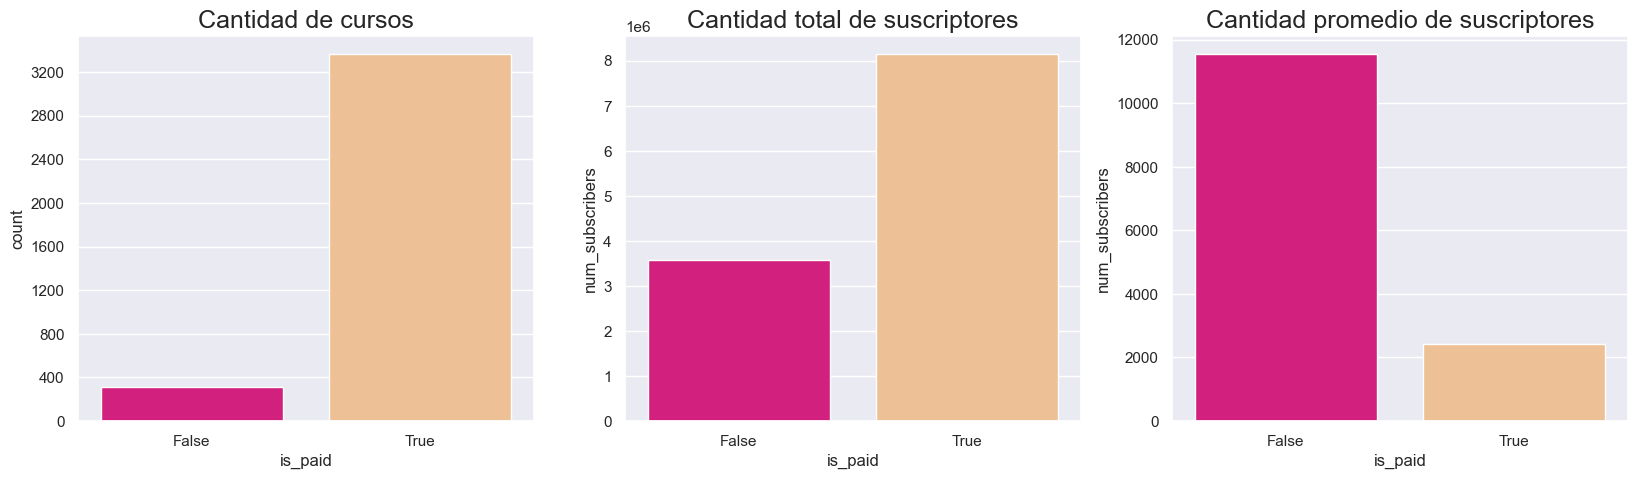

In [67]:
fig, (ax1, ax2, ax3)= plt.subplots(figsize=(20,5), nrows=1, ncols=3)
ax1.set_yticks(np.arange(0,4000,400))
ax1.set_title("Cantidad de cursos", fontsize=18)
ax3.set_title("Cantidad promedio de suscriptores", fontsize=18)
ax2.set_title("Cantidad total de suscriptores", fontsize=18)
sns.countplot(data=df_udemy, x="is_paid", ax=ax1, palette="Accent_r")
sns.barplot(data=df_udemy, x="is_paid", y="num_subscribers", ci=None, ax=ax3, palette="Accent_r")
sns.barplot(data=df_udemy, x="is_paid", y="num_subscribers", ci=None, ax=ax2, palette="Accent_r", estimator=sum)

Podemos observar que la mayoría de cursos y suscriptores son de pago, sin embargo, los cursos gratuitos poseen un mejor promedio de suscriptores. Esto indica que **es más facil que los cursos gratuitos obtengan suscriptores**.

Ahora vamos a ver cuales son las temáticas y los niveles que mayor cantidad de suscriptores tienen los **cursos de pago**

In [3]:
filtro1 = df_udemy[df_udemy["is_paid"]==True].groupby("subject").sum().sort_values("num_subscribers", ascending=False).num_subscribers.index
df_filtro2 = df_udemy.loc[(df_udemy["subject"]=="Web Development")]
order1 = ["All Levels", "Beginner Level", "Intermediate Level", "Expert Level"]

NameError: name 'df_udemy' is not defined

<AxesSubplot: title={'center': 'Suscriptores de WebDev por nivel'}, xlabel='level', ylabel='num_subscribers'>

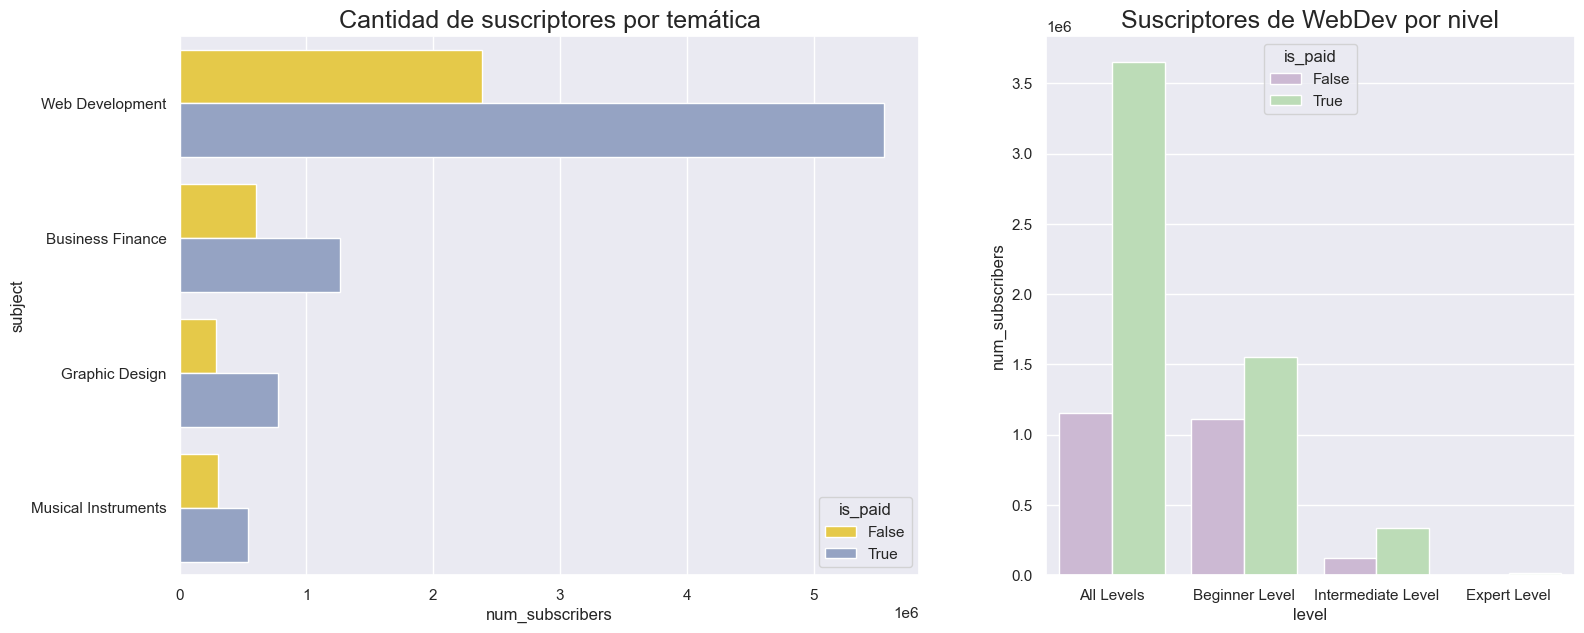

In [69]:
fig, (ax1, ax2)= plt.subplots(figsize=(18,7), nrows=1, ncols=2, width_ratios=[7,5])
ax1.set_title("Cantidad de suscriptores por temática", fontsize=18)
ax2.set_title("Suscriptores de WebDev por nivel", fontsize=18)
sns.barplot(data=df_udemy, y="subject", x="num_subscribers", hue="is_paid", ax=ax1, estimator=sum, ci=None, palette="Set2_r", orient="h", order=filtro1)
sns.barplot(data=df_filtro2, x="level", y="num_subscribers", hue="is_paid",ax=ax2, ci=None, estimator=sum, palette="PRGn", order=order1)

Gracias a estos gráficos, podemos confirmar que los cursos más populares son de **"Web Development"**. Y los niveles con más suscriptores de Web Development son **"All levels" y "Beginner Level"**.

- Los **cursos de pago** son los que poseen la mayor cantidad de suscriptores, independientemente del nivel.

- Los cursos más populares de **Web Development** son los cursos de **"All Levels"**, es decir, los cursos que comienzan desde un punto introductorio y terminan con un nivel de conocimiento avanzado. En segundo lugar se encuentran los **"Beginner Level"** que son cursos puramente introductorios.

Ahora vamos a analizar las temáticas que mayor dinero generan:

In [4]:
filtro_sale = df_udemy.groupby("subject").sum().sort_values(by="total_sale", ascending=False).total_sale.index

NameError: name 'df_udemy' is not defined

<AxesSubplot: title={'center': 'Venta por temática'}, xlabel='subject', ylabel='total_sale'>

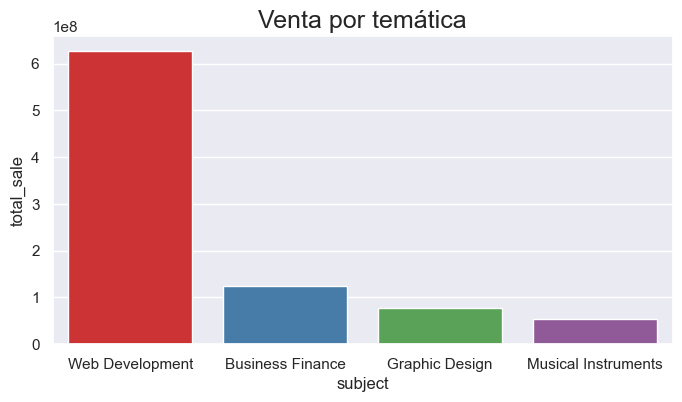

In [71]:
fig, ax= plt.subplots(figsize=(8,4))
ax.set_title("Venta por temática", fontsize=18)
sns.barplot(data=df_udemy, x="subject", y="total_sale", ax=ax, ci=None, estimator=sum, palette="Set1", order=filtro_sale)

Obtenemos este resultado que es obvio, ya que Web Development es la temática con mayor cantidad de suscriptores, por lo tanto es la que más ventas genera.

Sin embargo, podemos jugar un poco con los valores de "total_sale" y obtener el valor que cada temática genera por suscriptor

In [5]:
tematica = df_udemy[df_udemy["is_paid"]==True].groupby("subject").sum().sort_values(by="total_sale", ascending=False).num_subscribers.index
subs = df_udemy[df_udemy["is_paid"]==True].groupby("subject").sum().sort_values(by="total_sale", ascending=False).num_subscribers.values
venta = df_udemy[df_udemy["is_paid"]==True].groupby("subject").sum().sort_values(by="total_sale", ascending=False).total_sale.values

d = {"tematica": tematica, "subs": subs, "venta": venta, "venta_por_sub": venta/subs}
df = pd.DataFrame(data=d)

NameError: name 'df_udemy' is not defined

<AxesSubplot: title={'center': 'Venta por suscriptor'}, xlabel='venta_por_sub', ylabel='tematica'>

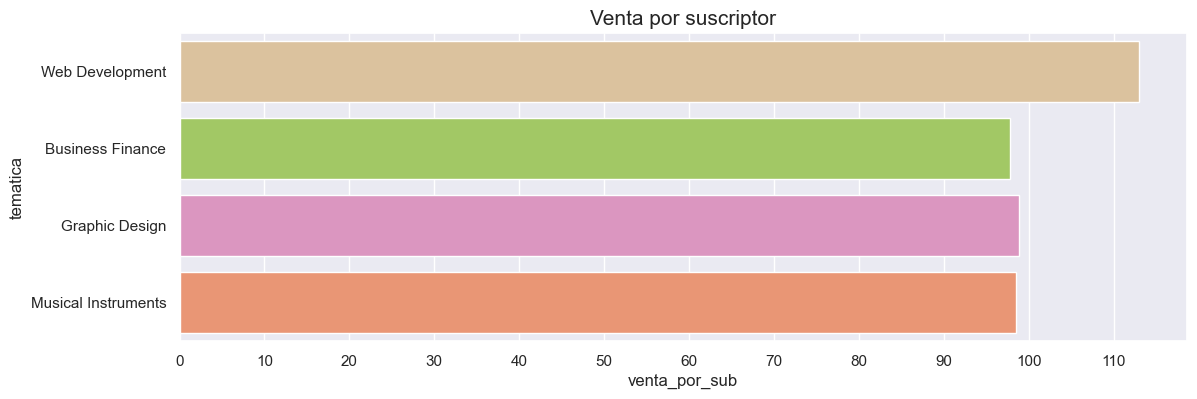

In [73]:
fig, ax = plt.subplots(figsize=(13,4))
ax.set_xticks(np.arange(0,120,10))
ax.set_title("Venta por suscriptor", fontsize=15)
sns.barplot(data=df, y="tematica", x="venta_por_sub", ax=ax, estimator=sum, ci=None, palette="Set2_r", orient="h")

Podemos observar que la mayoría de temáticas generan **$100 por suscriptor** aproximadamente, mientras que "WebDevelopment" consigue un **14% más de dinero por suscriptor.** 

Esto indica que la diferencia de ingresos entre las distintas temáticas no es un problema en los márgenes de ganancia, sino simplemente la cantidad de personas que lo compran.

Ya sabemos que **"Web Development"** es la temática más popular y que genera más ventas, pero ***`¿qué es lo que hace exitoso a un curso de esta temática?`***

<AxesSubplot: title={'center': 'Nivel que más dinero genera en WebDev'}, xlabel='level', ylabel='total_sale'>

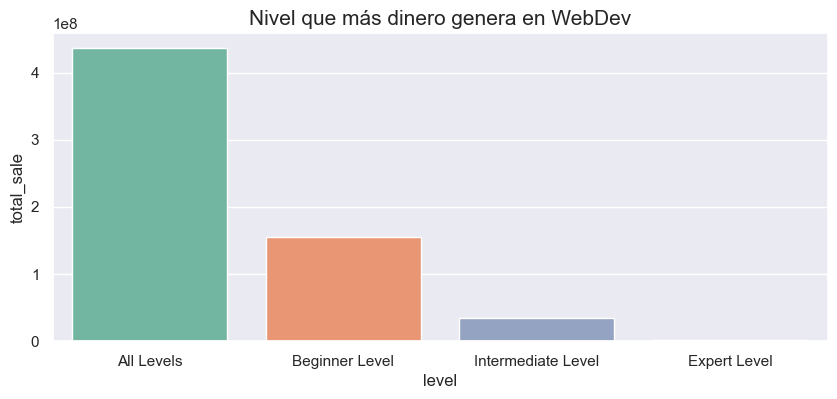

In [74]:
fig, ax= plt.subplots(figsize=(10,4))
ax.set_title("Nivel que más dinero genera en WebDev", fontsize=15)
sns.barplot(data=df_filtro2, x="level", y="total_sale", ax=ax, palette="Set2", order=order1, ci=None, estimator=sum)

Cursos completos ("All Levels") e introductorios ("Beginner Level") son los que generan más ventas, por lo que me voy a enfocar en ellos.

In [75]:
#Filtramos nuestro dataframe con las nuevas condiciones
df_filtro3 = df_udemy.loc[(df_udemy["subject"]=="Web Development") & ((df_udemy["level"]=="All Levels") | (df_udemy["level"]=="Beginner Level")) & (df_udemy["is_paid"]==True)]

Tenemos más de 900 cursos con las condiciones que nosotros específicamos:

In [76]:
df_filtro3.shape

(933, 13)

Voy a quedarme con los mejores 200 cursos, es decir, los que generan mayores ventas.

In [77]:
df_filtro3 = df_filtro3.sort_values(by="total_sale", ascending=False)
df_filtro3 = df_filtro3.iloc[:200]

Ya tenemos los mejores 200 cursos de "Web Development", ahora vamos a analizarlo:

Quiero saber cuales son las **palabras más repetidas en el titulo**, es decir, la tecnología que enseñan o el formato. Para ello voy a usar la libreria WordCloud.

In [78]:
from wordcloud import WordCloud, STOPWORDS

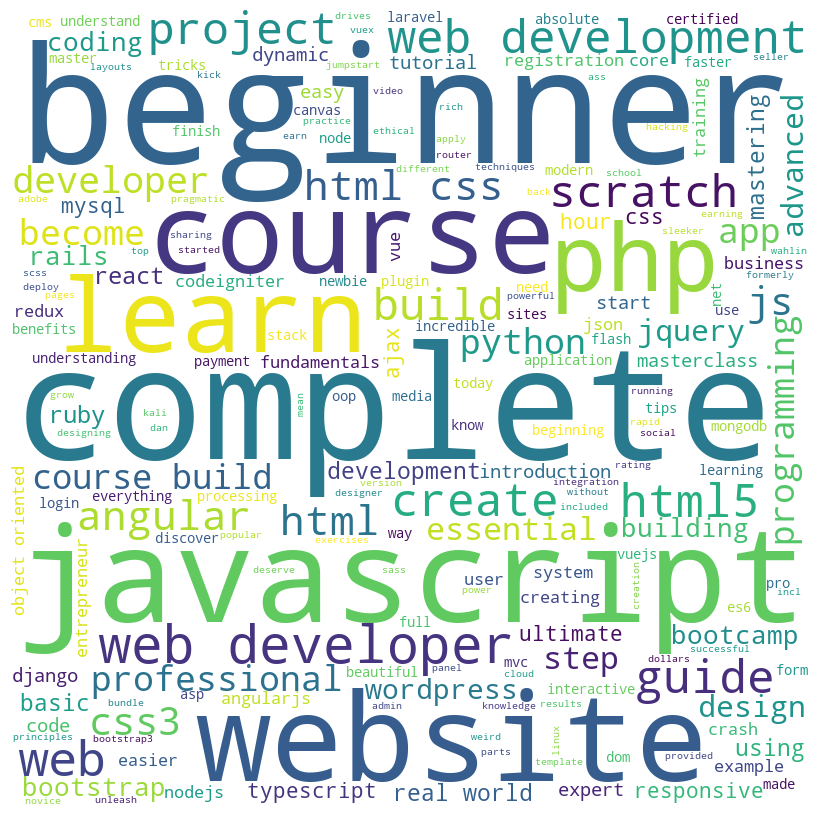

In [79]:
comment_words = ''
stopwords = set(STOPWORDS)

for i in df_filtro3.course_title:
    val = str(i)
    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Las palabras más repetidas en el título de los cursos son **"beginner", "complete", "website"** indicando que **`son cursos que comienzan desde cero y que abarcan la mayoría de los temas relacionados al desarrollo de páginas web.`**

Las tecnologías que más se repiten son:

- JavaScript
- PHP
- HTML
- CSS
- Angular
- Python
- WordPress
- TypeScript

Otra variable que puede servirnos para descifrar el éxito del curso sería **"content_duration"**, que indica el tiempo de duración en horas que posee el curso.

<AxesSubplot: title={'center': 'Distribución de la duración'}, xlabel='content_duration', ylabel='Count'>

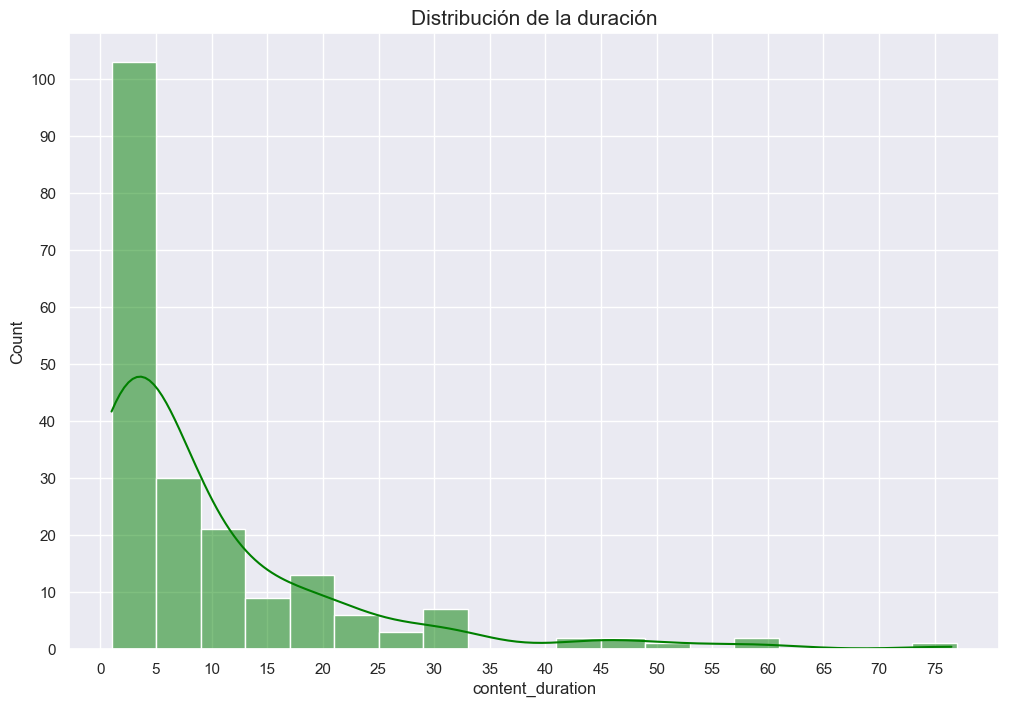

In [80]:
fig, ax= plt.subplots(figsize=(12,8))
ax.set_title("Distribución de la duración", fontsize=15)
ax.set_xticks(np.arange(0,80,5))
ax.set_yticks(np.arange(0,120,10))
sns.histplot(data=df_filtro3, x="content_duration", kde=True, stat="count", color="green", binwidth=4)

Esta gráfica nos indica que ***la mayoría de los cursos con mejores ventas tienen una duración media de 5 horas.***

In [82]:
#Exportamos csv
df_udemy.to_csv("Dataset modificado/udemy.csv")